In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import zipfile
import seaborn as sb
from matplotlib import rcParams
%matplotlib inline
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
file_path = "/content/drive/MyDrive/dataset/cleaned_output.csv"

df = pd.read_csv(file_path)

In [ ]:
df

,Longitude,Latitude,Light_intesity,geometry,index_right,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry_wkt,quarter
0,2.570833,51.100000,4.379785,POINT (2.570833354253705 51.10000040919949),864709,1202020331030322,87145,16421,13,7,5,"POLYGON ((2.57080078125 51.1000725724061, 2.57...",Q3
1,2.570833,51.100000,4.379785,POINT (2.570833354253705 51.10000040919949),472577,1202020331030322,89687,13885,14,12,6,"POLYGON ((2.57080078125 51.1000725724061, 2.57...",Q2
2,2.570833,51.100000,4.379785,POINT (2.570833354253705 51.10000040919949),73278,1202020331030322,37705,11653,14,3,3,"POLYGON ((2.57080078125 51.1000725724061, 2.57...",Q1
3,2.575000,51.100000,8.629868,POINT (2.5750000209537927 51.10000040919949),864709,1202020331030322,87145,16421,13,7,5,"POLYGON ((2.57080078125 51.1000725724061, 2.57...",Q3
4,2.575000,51.100000,8.629868,POINT (2.5750000209537927 51.10000040919949),472577,1202020331030322,89687,13885,14,12,6,"POLYGON ((2.57080078125 51.1000725724061, 2.57...",Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
848309,9.216667,41.370834,0.941497,POINT (9.216666740892764 41.37083366440025),786945,1202233230201103,32257,18731,39,5,1,"POLYGON ((9.2120361328125 41.3726864818646, 9....",Q2
848310,9.204167,41.366667,0.579097,POINT (9.204166740792502 41.36666699770013),398959,1202233230201031,13249,761,16,2,1,"POLYGON ((9.2010498046875 41.3685641368097, 9....",Q1
848311,9.204167,41.366667,0.579097,POINT (9.204166740792502 41.36666699770013),1578486,1202233230201031,7920,598,17,1,1,"POLYGON ((9.2010498046875 41.3685641368097, 9....",Q4
848312,9.204167,41.366667,0.579097,POINT (9.204166740792502 41.36666699770013),1184077,1202233230201031,9549,576,86,12,3,"POLYGON ((9.2010498046875 41.3685641368097, 9....",Q3


In [ ]:
from scipy.stats import pearsonr
aligned_data_path = '/content/drive/MyDrive/dataset/aligned_viirs_ookla_2022.csv'
df1 = pd.read_csv(aligned_data_path)

corr, p_value = pearsonr(df1['Light_intesity'], df1['avg_d_kbps'])


if p_value <= 0.05:
    print(f"Significant correlation: r = {corr:.2f}, p = {p_value:.5f}")
else:
    print(f"No significant correlation: r = {corr:.2f}, p = {p_value:.5f}")


Significant correlation: r = 0.17, p = 0.00000


In [ ]:
df_cleaned = df[df['Light_intesity'] != 0]


print("Cleaned DataFrame:",len(df_cleaned['Light_intesity']))
print(df_cleaned.head())


Cleaned DataFrame: 3748077
   Longitude   Latitude  Light_intesity
0   2.575000  51.112500        0.906811
1   2.566667  51.108334        1.029354
2   2.570833  51.108334        1.118787
3   2.575000  51.108334        1.295425
4   2.579167  51.108334        1.306384


In [ ]:
# Get the length of the cleaned DataFrame
num_rows = len(df_cleaned)
num_columns = len(df_cleaned.columns)

# Check for duplicate rows
duplicate_rows = df_cleaned.duplicated().sum()

# Check for missing values in each column
missing_values = df_cleaned.isnull().sum()

# Print results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print(f"Number of duplicate rows: {duplicate_rows}")
print(f"Missing values per column:\n{missing_values}")


Number of rows: 848314
Number of columns: 13
Number of duplicate rows: 0
Missing values per column:
Longitude         0
Latitude          0
Light_intesity    0
geometry          0
index_right       0
quadkey           0
avg_d_kbps        0
avg_u_kbps        0
avg_lat_ms        0
tests             0
devices           0
geometry_wkt      0
quarter           0
dtype: int64


In [ ]:
# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('/content/drive/MyDrive/dataset/cleaned_output.csv', index=False)


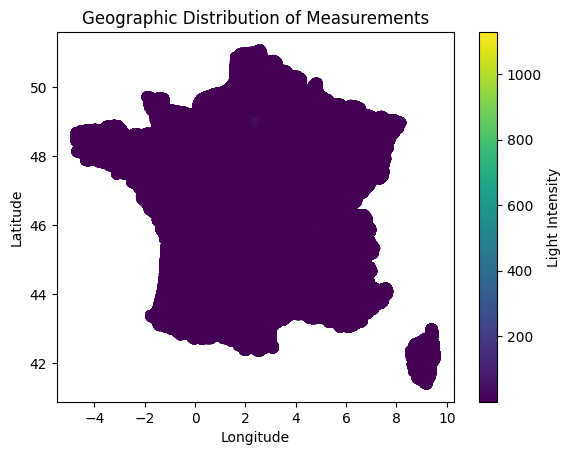

In [ ]:
plt.scatter(df['Longitude'], df['Latitude'], c=df['Light_intesity'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Measurements')
plt.colorbar(label='Light Intensity')
plt.show()

In [ ]:
import pandas as pd

# Load the quarterly datasets and add a 'quarter' column
q1 = pd.read_csv('/content/drive/MyDrive/dataset/ookla_data/france_performance_2022_Q1.csv')
q1['quarter'] = 'Q1'

q2 = pd.read_csv('/content/drive/MyDrive/dataset/ookla_data/france_performance_2022_Q2.csv')
q2['quarter'] = 'Q2'

q3 = pd.read_csv('/content/drive/MyDrive/dataset/ookla_data/france_performance_2022_Q3.csv')
q3['quarter'] = 'Q3'

q4 = pd.read_csv('/content/drive/MyDrive/dataset/ookla_data/france_performance_2022_Q4.csv')
q4['quarter'] = 'Q4'

# Combine all quarters into a single DataFrame
ookla_combined = pd.concat([q1, q2, q3, q4], ignore_index=True)

# Save the combined file
output_path = '/content/drive/MyDrive/dataset/ookla_data/combined_france_performance_2022.csv'
ookla_combined.to_csv(output_path, index=False)




In [ ]:
output_path = '/content/drive/MyDrive/dataset/ookla_data/combined_france_performance_2022.csv'
loaded_combined = pd.read_csv(output_path)
print(loaded_combined.head())

           quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0  313130231212232        4053         831         310     10        2   
1  313130231220312        6060         473         153      5        3   
2  313130231221002        6408         737         104      6        2   
3  313130231221123        5738         874          37      1        1   
4  313130231221211       13651         850          22      1        1   

                                        geometry_wkt quarter  
0  POLYGON ((-4.471435546875 51.0172104636422, -4...      Q1  
1  POLYGON ((-4.537353515625 50.9964717616163, -4...      Q1  
2  POLYGON ((-4.5263671875 51.0102985931896, -4.5...      Q1  
3  POLYGON ((-4.4989013671875 51.0033856925319, -...      Q1  
4  POLYGON ((-4.5098876953125 50.9999288558596, -...      Q1  


In [ ]:
from geopandas import points_from_xy
import geopandas as gpd

# Load VIIRS dataset
viirs_path = '/content/drive/MyDrive/dataset/cleaned_output.csv'
viirs_data = pd.read_csv(viirs_path)

# Convert VIIRS to GeoDataFrame
viirs_gdf = gpd.GeoDataFrame(
    viirs_data,
    geometry=points_from_xy(viirs_data['Longitude'], viirs_data['Latitude']),
    crs="EPSG:4326"
)

# Display VIIRS dataset overview
print("VIIRS Dataset Overview:")
print(viirs_gdf.head())


VIIRS Dataset Overview:
   Longitude   Latitude  Light_intesity                  geometry
0   2.575000  51.112500        0.906811     POINT (2.575 51.1125)
1   2.566667  51.108334        1.029354  POINT (2.56667 51.10833)
2   2.570833  51.108334        1.118787  POINT (2.57083 51.10833)
3   2.575000  51.108334        1.295425    POINT (2.575 51.10833)
4   2.579167  51.108334        1.306384  POINT (2.57917 51.10833)


In [ ]:
from shapely import wkt

# Convert Ookla geometry_wkt to GeoDataFrame

ookla_combined['geometry'] = ookla_combined['geometry_wkt'].apply(wkt.loads)
ookla_gdf = gpd.GeoDataFrame(ookla_combined, geometry='geometry', crs="EPSG:4326")
print("Head of Ookla GeoDataFrame:")
print(ookla_gdf.head())
# Spatial join to align VIIRS points with Ookla polygons


Head of Ookla GeoDataFrame:
           quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0  313130231212232        4053         831         310     10        2   
1  313130231220312        6060         473         153      5        3   
2  313130231221002        6408         737         104      6        2   
3  313130231221123        5738         874          37      1        1   
4  313130231221211       13651         850          22      1        1   

                                        geometry_wkt quarter  \
0  POLYGON ((-4.471435546875 51.0172104636422, -4...      Q1   
1  POLYGON ((-4.537353515625 50.9964717616163, -4...      Q1   
2  POLYGON ((-4.5263671875 51.0102985931896, -4.5...      Q1   
3  POLYGON ((-4.4989013671875 51.0033856925319, -...      Q1   
4  POLYGON ((-4.5098876953125 50.9999288558596, -...      Q1   

                                            geometry  
0  POLYGON ((-4.47144 51.01721, -4.46594 51.01721...  
1  POLYGON ((-4.53735 50.99647, 

In [ ]:
ookla_path = '/content/drive/MyDrive/dataset/ookla_data/combined_france_performance_2022.csv'
ookla_combined = pd.read_csv(ookla_path)


In [ ]:
aligned_data = gpd.sjoin(viirs_gdf, ookla_gdf, how="inner", predicate="intersects")

# Display aligned dataset overview

aligned_output_path = '/content/drive/MyDrive/dataset/aligned_viirs_ookla_2022.csv'
aligned_data.to_csv(aligned_output_path, index=False)

In [ ]:
# Aggregate data by quarter
aligned_data['quarter'] = aligned_data['quarter'].astype(str)
aggregated_data = aligned_data.groupby(['quarter', 'index_right'])[['Light_intesity', 'avg_d_kbps', 'avg_u_kbps']].mean().reset_index()

# Save aggregated data to a file
aggregated_output_path = '/content/drive/MyDrive/dataset/aggregated_viirs_ookla_2022.csv'
aggregated_data.to_csv(aggregated_output_path, index=False)




In [ ]:
import pandas as pd

# Load the aligned dataset
aligned_path = '/content/drive/MyDrive/dataset/aligned_viirs_ookla_2022.csv'
aligned_data = pd.read_csv(aligned_path)

# Load the aggregated dataset
aggregated_path = '/content/drive/MyDrive/dataset/aggregated_viirs_ookla_2022.csv'
aggregated_data = pd.read_csv(aggregated_path)

# Display overviews of both datasets
print("Aligned Dataset Overview:")
print(aligned_data.head(1))

print("\nAggregated Dataset Overview:")
print(aggregated_data.head(1))

# Compare column names
print("\nAligned Dataset Columns:")
print(aligned_data.columns)

print("\nAggregated Dataset Columns:")
print(aggregated_data.columns)


Aligned Dataset Overview:
   Longitude  Latitude  Light_intesity  \
0   2.570833      51.1        4.379785   

                                      geometry  index_right           quadkey  \
0  POINT (2.570833354253705 51.10000040919949)       864709  1202020331030322   

   avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0       87145       16421          13      7        5   

                                        geometry_wkt quarter  
0  POLYGON ((2.57080078125 51.1000725724061, 2.57...      Q3  

Aggregated Dataset Overview:
  quarter  index_right  Light_intesity  avg_d_kbps  avg_u_kbps
0      Q1        26240        0.493002     55330.0     37317.0

Aligned Dataset Columns:
Index(['Longitude', 'Latitude', 'Light_intesity', 'geometry', 'index_right',
       'quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices',
       'geometry_wkt', 'quarter'],
      dtype='object')

Aggregated Dataset Columns:
Index(['quarter', 'index_right', 'Light_intesity', 'avg_d_kb

In [ ]:
import matplotlib.pyplot as plt

region_id = 864709
region_data = aligned_data[aligned_data['index_right'] == region_id]


if region_data.empty:
    print(f"No data found for region ID {region_id}. Please check the dataset.")
else:

    region_data = region_data.sort_values('quarter')

    # Plot radiance and download speed over quarters
    plt.figure(figsize=(10, 6))
    plt.plot(
        region_data['quarter'],
        region_data['Light_intesity'],
        label='Radiance',
        marker='o'
    )
    plt.plot(
        region_data['quarter'],
        region_data['avg_d_kbps'],
        label='Download Speed',
        marker='x'
    )
    plt.xlabel('Quarter')
    plt.ylabel('Metric Value')
    plt.title(f"Time-Series of Radiance and Download Speed for Region {region_id}")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [ ]:
import seaborn as sns

# Scatter plot to visualize correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=aligned_data,
    x='Light_intesity',
    y='avg_d_kbps',
    hue='quarter',
    palette='coolwarm'
)
plt.title("Correlation Between Radiance and Download Speed")
plt.xlabel("Radiance")
plt.ylabel("Download Speed (kbps)")
plt.grid()
plt.show()


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare heatmap data (pivot by region and quarter)
heatmap_data = aligned_data.pivot_table(
    index='index_right',
    columns='quarter',
    values='Light_intesity',
    aggfunc=np.sum
)


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Heatmap of Radiance Drops Across Regions and Quarters")
plt.xlabel("Quarter")
plt.ylabel("Region (index_right)")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
